# Sentimental Analysis

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import re
import string
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# text preprocessing
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud, STOPWORDS

# plots and metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

In [2]:
#Load the dataset
df=pd.read_csv("data.csv")
del df["Unnamed: 0"]

In [3]:
#No. of sample in the dataset`
len(df)

182830

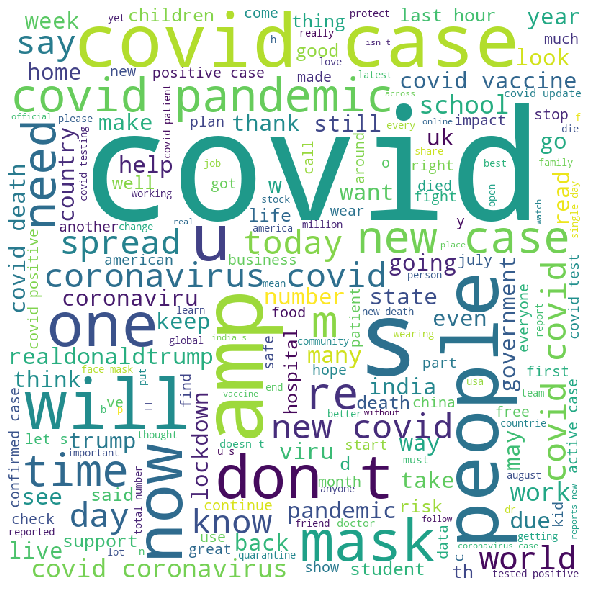

In [4]:
#wordcloud
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [5]:
#Sample dataset
df.head()

,Location,tweet
0,India,trending new yorkers encounter empty supermar...
1,India,when i couldn t find hand sanitizer at fred me...
2,India,find out how you can protect yourself and love...
3,India,panic buying hits newyork city as anxious sh...
4,India,toiletpaper dunnypaper coronavirus coronav...


In [40]:
#Location counts of each countries
df.Location.value_counts()

India        76868
US           44628
UK           37147
Australia    24184
Name: Location, dtype: int64

In [6]:
#sample tweet
df.iloc[2][1]

'find out how you can protect yourself and loved ones from  coronavirus   '

In [8]:
#create a new column - polarity
df["polarity"]=0

In [9]:
#remove null values
df.drop(labels=[21120,122852,164368],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
#check null value count
df.isna().sum()

Location    0
tweet       0
polarity    0
dtype: int64

In [11]:
#convert tweet into numpy array
text = df["tweet"].to_numpy()

In [12]:
#Determining the polarity of each tweet
from textblob import TextBlob
count=0
for i in range(len(text)):
#     count=count+1
    tex=text[i]
    blob = TextBlob(tex)
    total_pol=0        
    for sentence in blob.sentences:
        
        total_pol=total_pol + sentence.sentiment.polarity
        df.iloc[i,2]= total_pol
        


In [5]:
# from textblob import TextBlob
# text = "good morning"
# blob = TextBlob(text)
# for sentence in blob.sentences:
#      print(sentence.sentiment.polarity)
  

0.7


In [13]:
#Sentiment classification based on polarity value
df["sentiment"]=""
pol=df["polarity"].to_numpy()
for i in range(len(pol)):

    if pol[i] > 0:
        df.iloc[i,3]="Positive"
    elif pol[i] < 0:
        df.iloc[i,3]="Negative"
    else:
        df.iloc[i,3]="Neutral"


In [14]:
#sample data after sentiment classification
df.head()

,Location,tweet,polarity,sentiment
0,India,trending new yorkers encounter empty supermar...,0.018182,Positive
1,India,when i couldn t find hand sanitizer at fred me...,0.000000,Neutral
2,India,find out how you can protect yourself and love...,0.700000,Positive
3,India,panic buying hits newyork city as anxious sh...,0.050000,Positive
4,India,toiletpaper dunnypaper coronavirus coronav...,-0.016667,Negative


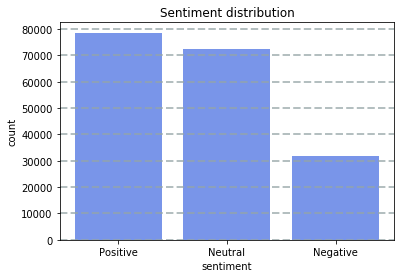

In [16]:
#Sentiment disrtibution
b=df.sentiment.value_counts().to_numpy()
a=df.sentiment.unique()

plt.bar(['Positive', 'Neutral','Negative'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Sentiment distribution')
plt.show()


In [17]:
#sentiment count
df.sentiment.value_counts()

Positive    78575
Neutral     72346
Negative    31906
Name: sentiment, dtype: int64

In [19]:
df.to_csv("final.csv",index=False)
df1=pd.read_csv("final.csv")

In [20]:
#group data based on location
gro=df1.groupby('Location')
india=gro.get_group("India")
USA=gro.get_group("US")
UK=gro.get_group("UK")
aus = gro.get_group("Australia")

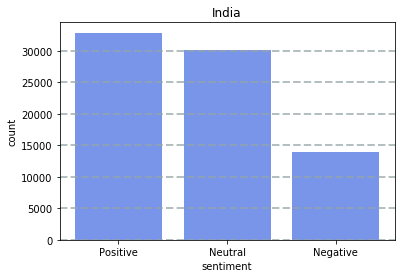

In [21]:
#sentiment distribution of India
b=india["sentiment"].value_counts().to_numpy()
a=india["sentiment"].unique()

plt.bar(['Positive', 'Neutral','Negative'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('India')
plt.show()


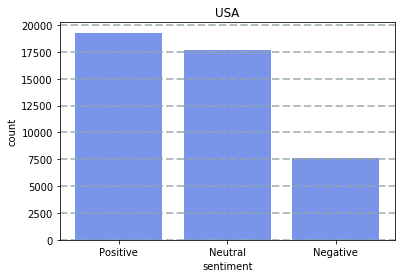

In [22]:
#sentiment distribution of USA
b=USA["sentiment"].value_counts().to_numpy()
a=USA["sentiment"].unique()

plt.bar(['Positive', 'Neutral','Negative'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('USA')
plt.show()


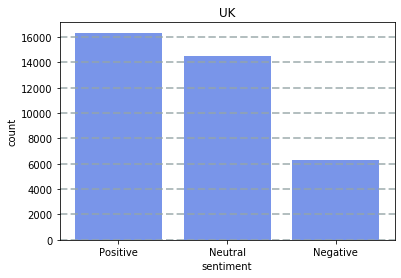

In [23]:
#sentiment distribution of UK
b=UK["sentiment"].value_counts().to_numpy()
a=UK["sentiment"].unique()

plt.bar(['Positive', 'Neutral','Negative'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('UK')
plt.show()


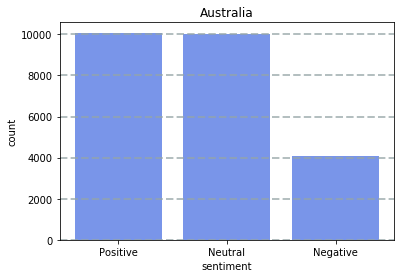

In [24]:
#sentiment distribution of Australia
b=aus["sentiment"].value_counts().to_numpy()
a=aus["sentiment"].unique()

plt.bar(['Positive', 'Neutral','Negative'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('Australia')
plt.show()


# Emotion Analysis

In [26]:
#Load the pre classified data set 
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

X_train = df_train.Text
X_test = df_test.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())

data.head()

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [27]:
#confusion matrix function
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [28]:
#preprocessing of tweets
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

In [29]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

Accuracy: 67.02%

F1 Score: 67.02

COnfusion Matrix:
 [[469  32  44  28 120]
 [ 73 420  55  16 115]
 [ 56  18 475  68  90]
 [ 61  20  76 385  96]
 [ 68  20  48  15 525]]


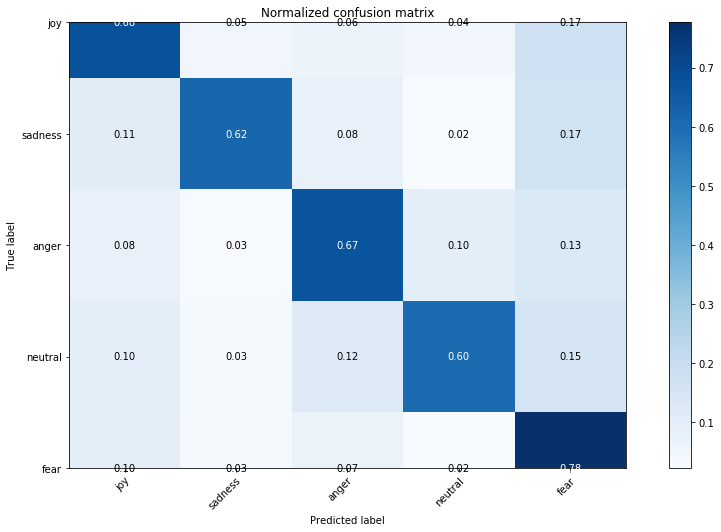

In [30]:
#Navie Bayes
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Accuracy: 62.95%

F1 Score: 62.95

COnfusion Matrix:
 [[396  83  58  79  77]
 [ 85 427  44  70  53]
 [ 72  62 419 104  50]
 [ 35  24  48 504  27]
 [102  64  59  61 390]]


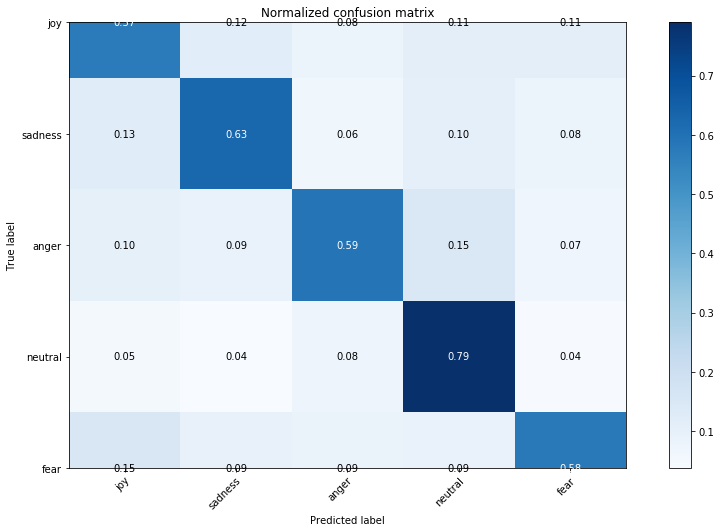

In [31]:
#Random forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Accuracy: 69.35%

F1 Score: 69.35

COnfusion Matrix:
 [[456  67  44  68  58]
 [ 65 483  42  50  39]
 [ 56  34 476 101  40]
 [ 41  23  43 498  33]
 [ 82  60  51  43 440]]


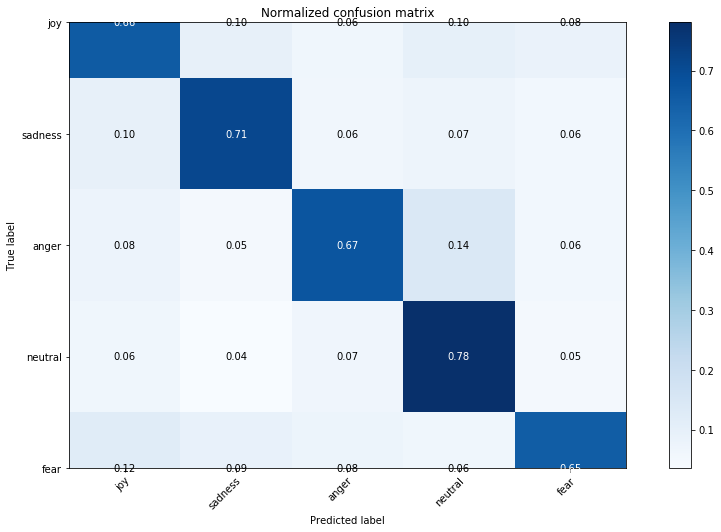

In [33]:
#LogisticRegression
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Accuracy: 72.71%

F1 Score: 72.71

COnfusion Matrix:
 [[490  49  41  58  55]
 [ 53 508  34  40  44]
 [ 50  33 498  91  35]
 [ 34  23  38 505  38]
 [ 72  43  53  42 466]]


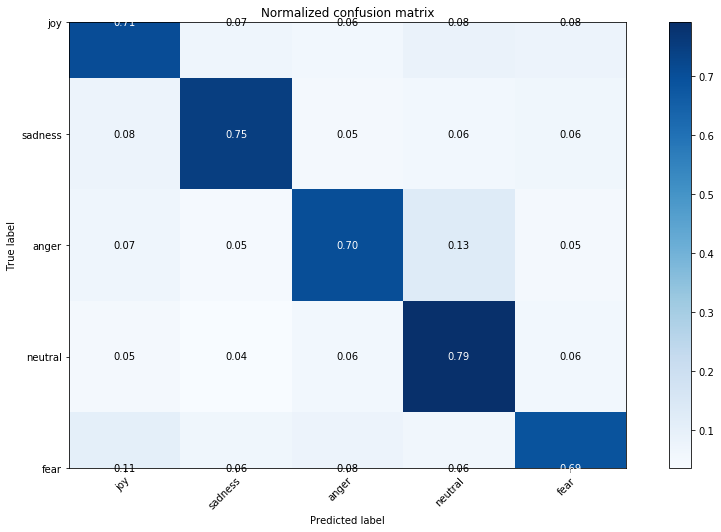

In [32]:
#SVM
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [34]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [35]:
# save the model
filename = 'tfidf_svm.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [36]:
model = pickle.load(open(filename, 'rb'))

# message = 'i am happy' 
# model.predict([message])[0]

In [37]:
#classifying the tweets 
df = pd.read_csv('final.csv')

In [38]:
df.pop('polarity')
df.pop('sentiment')


0         Positive
1          Neutral
2         Positive
3         Positive
4         Negative
            ...   
182822     Neutral
182823    Positive
182824    Negative
182825    Positive
182826    Negative
Name: sentiment, Length: 182827, dtype: object

In [39]:
#sample data
df.head()

,Location,tweet
0,India,trending new yorkers encounter empty supermar...
1,India,when i couldn t find hand sanitizer at fred me...
2,India,find out how you can protect yourself and love...
3,India,panic buying hits newyork city as anxious sh...
4,India,toiletpaper dunnypaper coronavirus coronav...


In [40]:
#Emotional classification
df["emotion"]=""
model = pickle.load(open(filename, 'rb'))
emotion_array = []
for i in range(0,182827):
   message = df.iloc[i][1]
   val=model.predict([message])
   df.iloc[i,2]= val[0]
        

In [41]:
#sample data
df.head()

,Location,tweet,emotion
0,India,trending new yorkers encounter empty supermar...,fear
1,India,when i couldn t find hand sanitizer at fred me...,fear
2,India,find out how you can protect yourself and love...,neutral
3,India,panic buying hits newyork city as anxious sh...,anger
4,India,toiletpaper dunnypaper coronavirus coronav...,neutral


In [42]:
#Emotion count
df.emotion.value_counts()

fear       50645
neutral    37001
joy        35359
anger      34548
sadness    25274
Name: emotion, dtype: int64

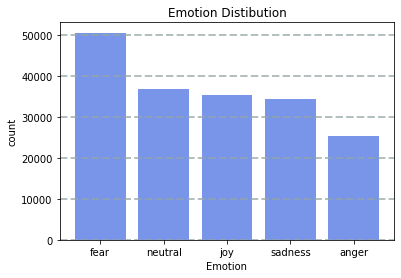

In [43]:
# gro=df1.groupby('emotion')
#Emotion distribution
b=df.emotion.value_counts().to_numpy()
a=df.emotion.unique()

plt.bar(['fear','neutral','joy','sadness','anger'],b, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xlabel('Emotion')
plt.ylabel('count')
plt.title('Emotion Distibution')
plt.show()
